### Notebook 03: Baseline Models

This notebook builds the baseline machine learning models (Logistic Regresssion, Random Forest, and XGBoost).

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load preprocessed data
preprocessed_file = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Data\ea_modelset\eamodelset\dataset\preprocessed_models.csv'
models_df = pd.read_csv(preprocessed_file)
models_df.head()

,id,name,duplicateCount,elementCount,relationshipCount,viewCount,num_formats,hasWarning,hasDuplicate,rel_elem_ratio,...,language_pl,language_pt,language_ru,language_sl,language_sv,language_tl,language_vi,language_yo,language_zh,arb_outcome
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,0,142,296,24,4,0,0,2.084507,...,0,0,0,0,0,0,0,0,0,0
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,0,22,28,1,4,0,0,1.272727,...,0,0,0,0,0,0,0,0,0,1
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,0,55,41,3,4,0,0,0.745455,...,0,0,1,0,0,0,0,0,0,0
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,0,15,11,1,2,0,0,0.733333,...,0,0,0,0,0,0,0,0,0,1
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,0,18,20,1,4,0,0,1.111111,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Define arb_outcome as target variable (y) and features (X)
X = models_df.drop(columns=['name','id','arb_outcome'])
y = models_df['arb_outcome']

# Check shape of X and y
print(f"Models DataFrame shape: {models_df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Models DataFrame shape: (978, 41)
Features shape: (978, 38)
Target shape: (978,)


In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (782, 38), (782,)
Test set shape: (196, 38), (196,)


### LOGISTIC REGRESSION

In [5]:
logistic_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        solver ="lbfgs"
    ))
])

### RANDOM FOREST

In [6]:
random_forest = RandomForestClassifier(
    random_state=42, 
    n_estimators=300
)

## XGBOOST

In [7]:
xgboost = XGBClassifier(
    random_state=42, 
    n_estimators=300, 
    learning_rate=0.1, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    objective="multi:softprob", 
    num_class=3
)

In [8]:
# Create a dictionary of models
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'XGBoost': xgboost
}   

In [9]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred)) 


Training and evaluating: Logistic Regression
Accuracy: 0.8367
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.48      0.62        50
           1       0.78      0.96      0.86       105
           2       1.00      0.95      0.97        41

    accuracy                           0.84       196
   macro avg       0.88      0.80      0.82       196
weighted avg       0.85      0.84      0.82       196

Confusion Matrix:
[[ 24  26   0]
 [  4 101   0]
 [  0   2  39]]

Training and evaluating: Random Forest
Accuracy: 0.9898
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.99      0.99      0.99       105
           2       1.00      1.00      1.00        41

    accuracy                           0.99       196
   macro avg       0.99      0.99      0.99       196
weighted avg       0.99      0.99      0.99       196

Confusio

In [10]:
# Create a table to summarize model performances
performance_summary = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_summary.append({
        'Model': model_name,
        'Accuracy': accuracy
    })
performance_df = pd.DataFrame(performance_summary)
print("\nModel Performance Summary:")
print(performance_df)



Model Performance Summary:
                 Model  Accuracy
0  Logistic Regression  0.836735
1        Random Forest  0.989796
2              XGBoost  0.994898


#### XGBoost outperformed the other models with the highest accuracy (0.995). Randon Forest also performed well with an accuracy of 0.990, while Logistic Regression had a lower accuracy of 0.837.

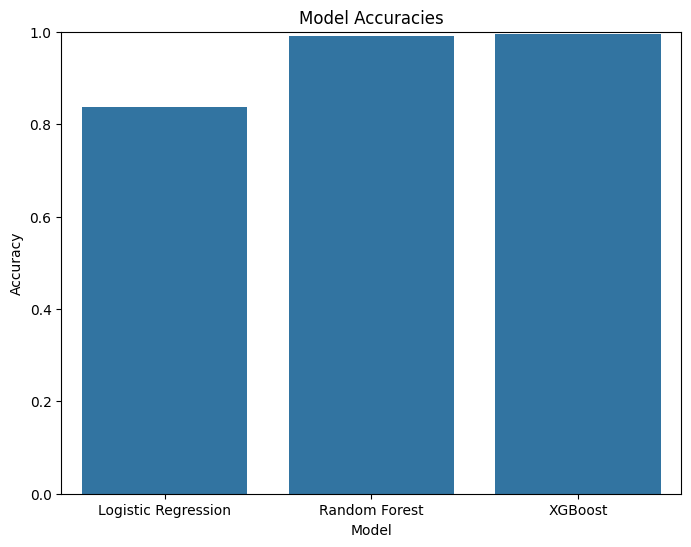

In [11]:
# Create bar plot for model accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


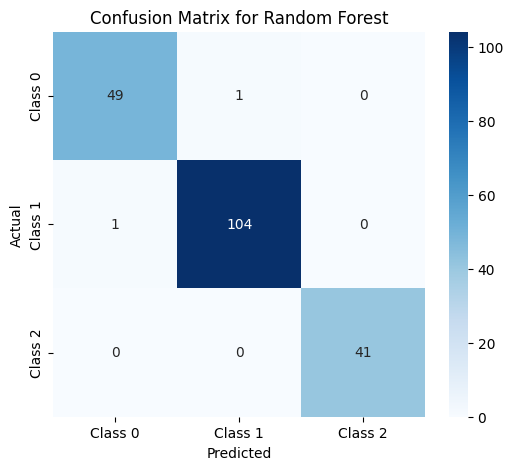

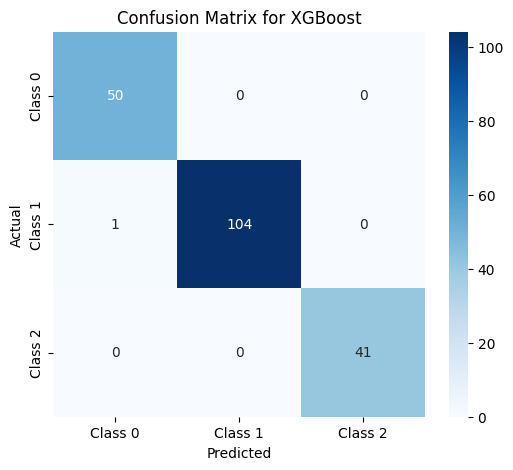

In [12]:
# Create confusion matrix heatmaps for Random Forest and XGBoost
for model_name in ['Random Forest', 'XGBoost']:
    model = models[model_name]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1', 'Class 2'],
                yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    



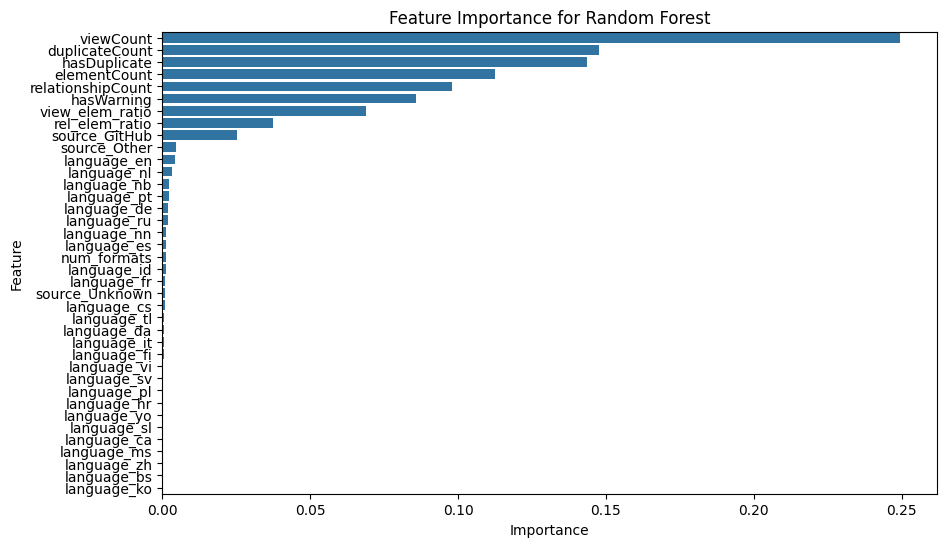

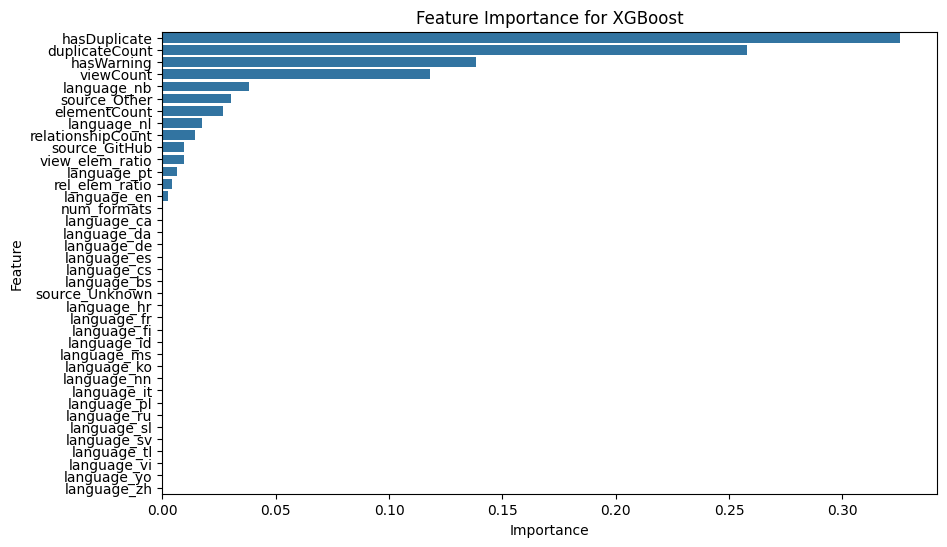

In [13]:
# Display feature importance for tree-based models
for model_name, model in models.items():
    if model_name in ['Random Forest', 'XGBoost']:
        feature_importances = model.feature_importances_
        features = X.columns
        
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

The most important features identified by both Random Forest and XGBoost models include 'hasDuplicate', 'duplicateCount', 'hasWarning', and 'viewCount', indicating these features significantly influence the ARB outcome predictions.

In [14]:
# Save baseline models
model_dir = r'C:\Users\anitr\AAI590_Capstone\AAI590_Capstone_AH\Models\baseline_models'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(logistic_regression, os.path.join(model_dir, 'logistic_regression.pkl'))
joblib.dump(random_forest, os.path.join(model_dir, 'random_forest.pkl'))
joblib.dump(xgboost, os.path.join(model_dir, 'xgboost.pkl'))

print("Baseline models saved successfully.")

Baseline models saved successfully.
